In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [2]:
text = open('read1.txt',encoding='utf-8').read()
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))
tokenized_words = word_tokenize(cleaned_text,"english")

In [3]:
final_words=[]

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [4]:
lemma_words =[]

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [5]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' attracted', ' fearless', ' attached', ' happy', ' happy', ' average', ' independent', ' happy'] 
 

Count of each emotion 
 Counter({' happy': 3, ' attracted': 1, ' fearless': 1, ' attached': 1, ' average': 1, ' independent': 1})


In [6]:
sa = SentimentIntensityAnalyzer()

print(sa.polarity_scores(cleaned_text))

{'neg': 0.019, 'neu': 0.904, 'pos': 0.078, 'compound': 0.9982}


In [7]:
def sentiment_analysis(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n Negative Sentiment")
    
    elif score['neg'] < score['pos']:
        print("\n Positive Sentiment")
        
    else:
        print("\n Neutral Sentiment")
    


 Positive Sentiment


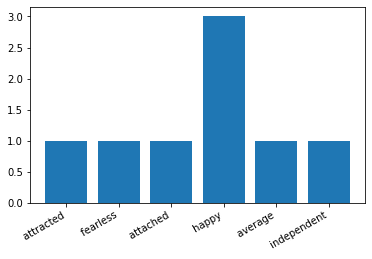

In [8]:
sentiment_analysis(cleaned_text)

fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()